In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def import_data(file_path : str):
    with open(file_path, "r") as file:
        data = file.readlines()
    
    h = data[0]
    r = data[1:]
    
    return h.strip(), [[item for item in row.strip().split()] for row in r if row.strip() != ""]

In [3]:
# 1 - baseCount 3000 commandCount 10000
# 2 - baseCount 100 commandCount 1000
# 3 - baseCount 10000 commandCount 40000
# 4 - baseCount 1000 commandCount 400000
# 5 - baseCount 300 commandCount 400000
# 6 - baseCount 0 commandCount 100000
# 7 - baseCount 0 commandCount 1000000
headerSimple, rowsSimple = import_data("./data/6/simple_memory_resource.txt")
headerTwin, rowsTwin = import_data("./data/6/twins_memory_resource.txt")

In [4]:
headerSimple

'objectsCount time allocatedMemory usedMemory commandType'

In [5]:
dfSimple = pd.DataFrame(rowsSimple, columns=headerSimple.split())
dfTwin = pd.DataFrame(rowsTwin, columns=headerTwin.split())

In [6]:
dfSimple

,objectsCount,time,allocatedMemory,usedMemory,commandType
0,0,0,0,0,DEALLOCATE
1,0,0,0,0,DEALLOCATE
2,1,1.5248e-05,4096,72,ALLOCATE
3,0,1.513e-06,4096,0,DEALLOCATE
4,0,0,4096,0,DEALLOCATE
...,...,...,...,...,...
100660,4,1.1782e-05,61440,288,DEALLOCATE
100661,3,1.0409e-05,61440,216,DEALLOCATE
100662,2,1.087e-05,61440,144,DEALLOCATE
100663,1,1.081e-05,61440,72,DEALLOCATE


In [7]:
dfSimple = dfSimple[dfSimple["time"] != "0"]
dfTwin = dfTwin[dfTwin["time"] != "0"]

In [8]:
dfSimple = dfSimple.reset_index()
dfTwin = dfTwin.reset_index()

In [9]:
dfSimple

,index,objectsCount,time,allocatedMemory,usedMemory,commandType
0,2,1,1.5248e-05,4096,72,ALLOCATE
1,3,0,1.513e-06,4096,0,DEALLOCATE
2,5,1,1.0159e-05,4096,72,ALLOCATE
3,6,0,1.543e-06,4096,0,DEALLOCATE
4,7,1,3.086e-06,4096,72,ALLOCATE
...,...,...,...,...,...,...
100617,100660,4,1.1782e-05,61440,288,DEALLOCATE
100618,100661,3,1.0409e-05,61440,216,DEALLOCATE
100619,100662,2,1.087e-05,61440,144,DEALLOCATE
100620,100663,1,1.081e-05,61440,72,DEALLOCATE


In [10]:
dfTwin

,index,objectsCount,time,allocatedMemory,usedMemory,commandType
0,2,1,7.8546e-05,4096,72,ALLOCATE
1,3,0,2.692e-05,4096,0,DEALLOCATE
2,5,1,4.321e-05,4096,72,ALLOCATE
3,6,0,1.646e-05,4096,0,DEALLOCATE
4,7,1,4.1367e-05,4096,72,ALLOCATE
...,...,...,...,...,...,...
100617,100660,4,1.4287e-05,94208,288,DEALLOCATE
100618,100661,3,1.2524e-05,94208,216,DEALLOCATE
100619,100662,2,3.666e-06,94208,144,DEALLOCATE
100620,100663,1,1.4217e-05,94208,72,DEALLOCATE


In [11]:
def set_column_types(df: pd.DataFrame) -> pd.DataFrame:
    df['objectsCount'] = df['objectsCount'].astype("int")
    df['time'] = df['time'].astype("float64")
    df['allocatedMemory'] = df['allocatedMemory'].astype("int")
    df['usedMemory'] = df['usedMemory'].astype("int")
    return df

In [12]:
dfSimple = set_column_types(dfSimple)
dfTwin = set_column_types(dfTwin)

In [13]:
dfSimple

,index,objectsCount,time,allocatedMemory,usedMemory,commandType
0,2,1,0.000015,4096,72,ALLOCATE
1,3,0,0.000002,4096,0,DEALLOCATE
2,5,1,0.000010,4096,72,ALLOCATE
3,6,0,0.000002,4096,0,DEALLOCATE
4,7,1,0.000003,4096,72,ALLOCATE
...,...,...,...,...,...,...
100617,100660,4,0.000012,61440,288,DEALLOCATE
100618,100661,3,0.000010,61440,216,DEALLOCATE
100619,100662,2,0.000011,61440,144,DEALLOCATE
100620,100663,1,0.000011,61440,72,DEALLOCATE


In [14]:
dfTwin

,index,objectsCount,time,allocatedMemory,usedMemory,commandType
0,2,1,0.000079,4096,72,ALLOCATE
1,3,0,0.000027,4096,0,DEALLOCATE
2,5,1,0.000043,4096,72,ALLOCATE
3,6,0,0.000016,4096,0,DEALLOCATE
4,7,1,0.000041,4096,72,ALLOCATE
...,...,...,...,...,...,...
100617,100660,4,0.000014,94208,288,DEALLOCATE
100618,100661,3,0.000013,94208,216,DEALLOCATE
100619,100662,2,0.000004,94208,144,DEALLOCATE
100620,100663,1,0.000014,94208,72,DEALLOCATE


In [15]:
dfSimple["type"] = "simple"
dfTwin["type"] = "twin"

In [16]:
dfSimple["idx"] = dfSimple.index
dfTwin["idx"] = dfTwin.index

In [17]:
dfSimple

,index,objectsCount,time,allocatedMemory,usedMemory,commandType,type,idx
0,2,1,0.000015,4096,72,ALLOCATE,simple,0
1,3,0,0.000002,4096,0,DEALLOCATE,simple,1
2,5,1,0.000010,4096,72,ALLOCATE,simple,2
3,6,0,0.000002,4096,0,DEALLOCATE,simple,3
4,7,1,0.000003,4096,72,ALLOCATE,simple,4
...,...,...,...,...,...,...,...,...
100617,100660,4,0.000012,61440,288,DEALLOCATE,simple,100617
100618,100661,3,0.000010,61440,216,DEALLOCATE,simple,100618
100619,100662,2,0.000011,61440,144,DEALLOCATE,simple,100619
100620,100663,1,0.000011,61440,72,DEALLOCATE,simple,100620


In [18]:
dfTwin

,index,objectsCount,time,allocatedMemory,usedMemory,commandType,type,idx
0,2,1,0.000079,4096,72,ALLOCATE,twin,0
1,3,0,0.000027,4096,0,DEALLOCATE,twin,1
2,5,1,0.000043,4096,72,ALLOCATE,twin,2
3,6,0,0.000016,4096,0,DEALLOCATE,twin,3
4,7,1,0.000041,4096,72,ALLOCATE,twin,4
...,...,...,...,...,...,...,...,...
100617,100660,4,0.000014,94208,288,DEALLOCATE,twin,100617
100618,100661,3,0.000013,94208,216,DEALLOCATE,twin,100618
100619,100662,2,0.000004,94208,144,DEALLOCATE,twin,100619
100620,100663,1,0.000014,94208,72,DEALLOCATE,twin,100620


In [19]:
df = pd.concat([dfSimple, dfTwin], ignore_index=True)

In [20]:
df

,index,objectsCount,time,allocatedMemory,usedMemory,commandType,type,idx
0,2,1,0.000015,4096,72,ALLOCATE,simple,0
1,3,0,0.000002,4096,0,DEALLOCATE,simple,1
2,5,1,0.000010,4096,72,ALLOCATE,simple,2
3,6,0,0.000002,4096,0,DEALLOCATE,simple,3
4,7,1,0.000003,4096,72,ALLOCATE,simple,4
...,...,...,...,...,...,...,...,...
201239,100660,4,0.000014,94208,288,DEALLOCATE,twin,100617
201240,100661,3,0.000013,94208,216,DEALLOCATE,twin,100618
201241,100662,2,0.000004,94208,144,DEALLOCATE,twin,100619
201242,100663,1,0.000014,94208,72,DEALLOCATE,twin,100620


Text(0.5, 1.0, 'Command execution time over time')

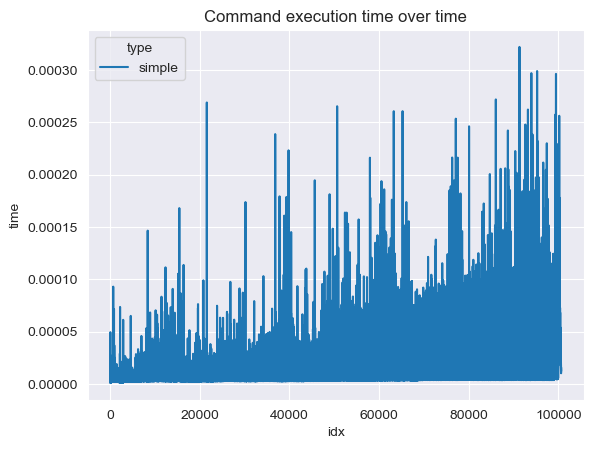

In [21]:
sns.lineplot(data=df[df['type'] == "simple"], x="idx", y="time", hue="type").set_title("Command execution time over time")

Text(0.5, 1.0, 'Command execution time over time')

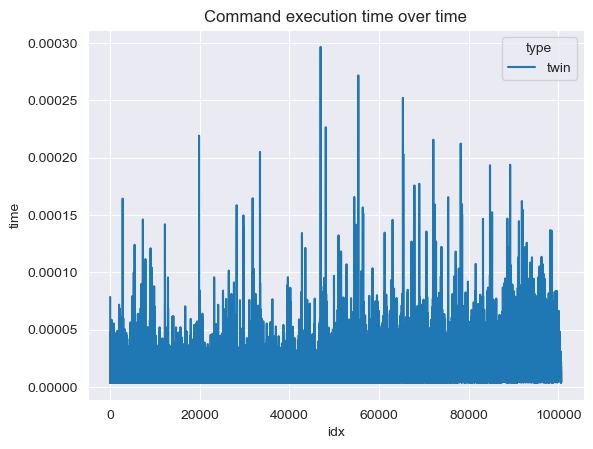

In [22]:
sns.lineplot(data=df[df['type'] == "twin"], x="idx", y="time", hue="type").set_title("Command execution time over time")

Text(0.5, 1.0, 'Command execution time over time')

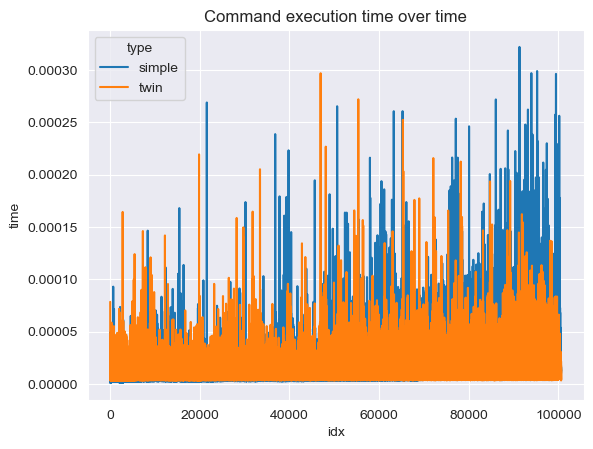

In [23]:
sns.lineplot(data=df, x="idx", y="time", hue="type").set_title("Command execution time over time")

In [24]:
df["usageFactor"] = df["usedMemory"] / df["allocatedMemory"]

Text(0.5, 1.0, 'Usage factor over time')

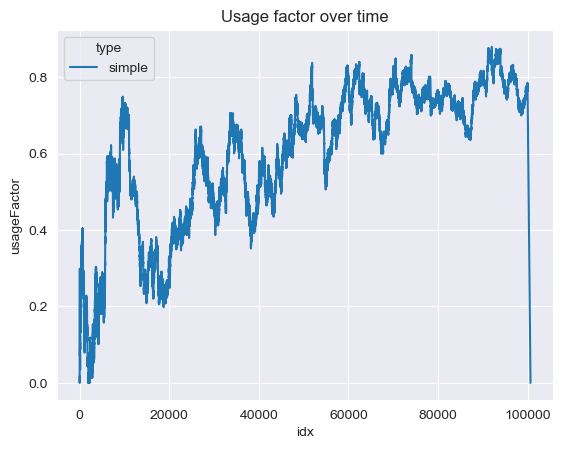

In [25]:
sns.lineplot(data=df[df['type'] == "simple"], x="idx", y="usageFactor", hue="type").set_title("Usage factor over time")

Text(0.5, 1.0, 'Usage factor over time')

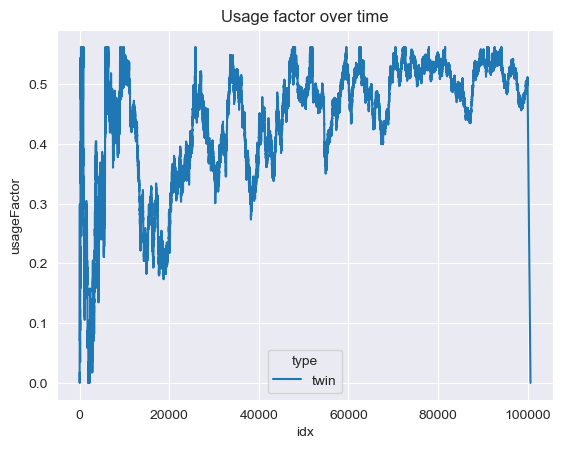

In [26]:
sns.lineplot(data=df[df['type'] == "twin"], x="idx", y="usageFactor", hue="type").set_title("Usage factor over time")

Text(0.5, 1.0, 'Usage factor over time')

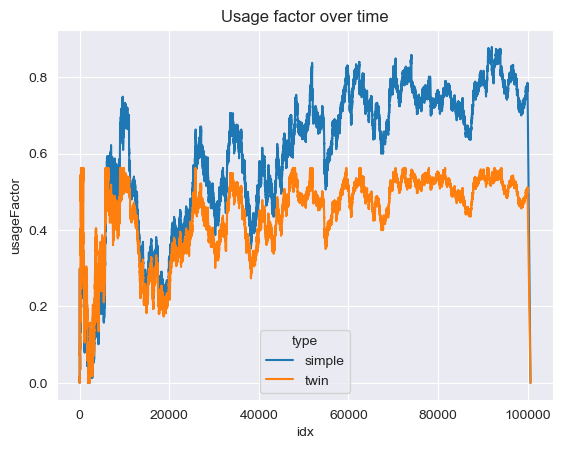

In [27]:
sns.lineplot(data=df, x="idx", y="usageFactor", hue="type").set_title("Usage factor over time")

Text(0.5, 1.0, 'Allocation execution time over time')

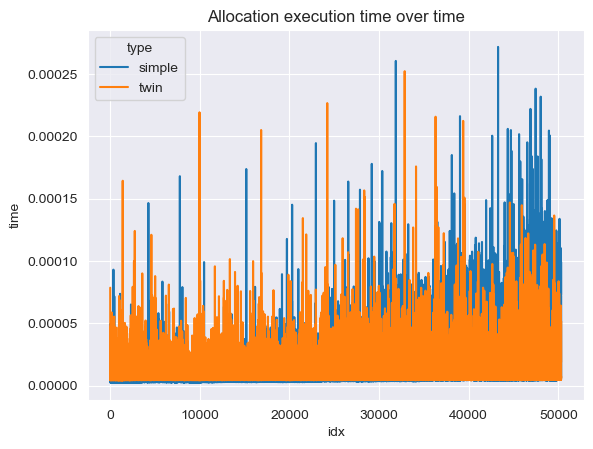

In [28]:
dfSimpleAllocate = dfSimple.drop(columns=["idx"])[dfSimple["commandType"] == "ALLOCATE"]
dfTwinAllocate = dfTwin.drop(columns=["idx"])[dfTwin["commandType"] == "ALLOCATE"]

dfSimpleAllocate = dfSimpleAllocate.reset_index()
dfTwinAllocate = dfTwinAllocate.reset_index()

dfSimpleAllocate["idx"] = dfSimpleAllocate.index
dfTwinAllocate["idx"] = dfTwinAllocate.index

dfAllocate = pd.concat([dfSimpleAllocate, dfTwinAllocate], ignore_index=True)

sns.lineplot(data=dfAllocate, x="idx", y="time", hue="type").set_title("Allocation execution time over time")

In [36]:
dfSimpleAllocate["time"].max() * 1e5, dfTwinAllocate["time"].max() * 1e5 

(27.1724, 25.225900000000003)

In [37]:
dfSimpleAllocate["time"].mean()* 1e5, dfTwinAllocate["time"].mean() * 1e5

(1.3993522668998826, 1.0560831647154698)

In [38]:
dfSimpleAllocate["time"].min() * 1e5, dfTwinAllocate["time"].min() * 1e5 

(0.21639999999999998, 0.43279999999999996)

Text(0.5, 1.0, 'Deallocation execution time over time')

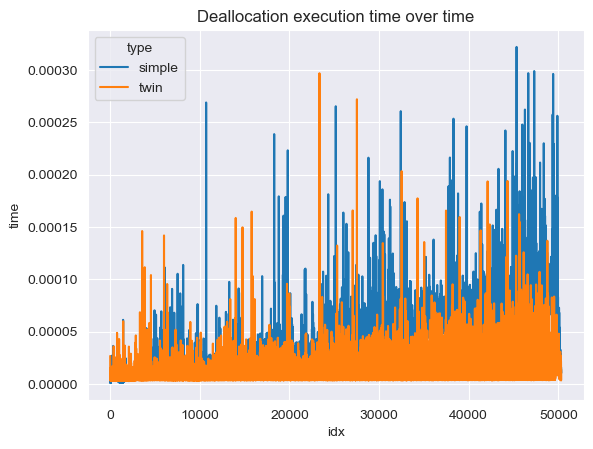

In [32]:
dfSimpleDeallocate = dfSimple.drop(columns=["idx"])[dfSimple["commandType"] == "DEALLOCATE"]
dfTwinDeallocate = dfTwin.drop(columns=["idx"])[dfTwin["commandType"] == "DEALLOCATE"]

dfSimpleDeallocate = dfSimpleDeallocate.reset_index()
dfTwinDeallocate = dfTwinDeallocate.reset_index()

dfSimpleDeallocate["idx"] = dfSimpleDeallocate.index
dfTwinDeallocate["idx"] = dfTwinDeallocate.index

dfDeallocate = pd.concat([dfSimpleDeallocate, dfTwinDeallocate], ignore_index=True)

sns.lineplot(data=dfDeallocate, x="idx", y="time", hue="type").set_title("Deallocation execution time over time")

In [33]:
df

,index,objectsCount,time,allocatedMemory,usedMemory,commandType,type,idx,usageFactor
0,2,1,0.000015,4096,72,ALLOCATE,simple,0,0.017578
1,3,0,0.000002,4096,0,DEALLOCATE,simple,1,0.000000
2,5,1,0.000010,4096,72,ALLOCATE,simple,2,0.017578
3,6,0,0.000002,4096,0,DEALLOCATE,simple,3,0.000000
4,7,1,0.000003,4096,72,ALLOCATE,simple,4,0.017578
...,...,...,...,...,...,...,...,...,...
201239,100660,4,0.000014,94208,288,DEALLOCATE,twin,100617,0.003057
201240,100661,3,0.000013,94208,216,DEALLOCATE,twin,100618,0.002293
201241,100662,2,0.000004,94208,144,DEALLOCATE,twin,100619,0.001529
201242,100663,1,0.000014,94208,72,DEALLOCATE,twin,100620,0.000764


Text(0.5, 1.0, 'Object amount over time')

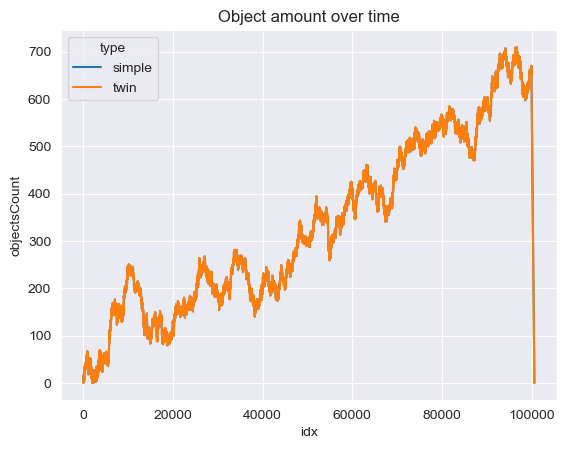

In [34]:
sns.lineplot(data=df, x="idx", y="objectsCount", hue="type").set_title("Object amount over time")